# Predict if a football player will increase in valuation using Football Manager data

The goal of this project is to be able to predict football players who will have an increase in their value in the future, using Football Manager (FM) data.

FM is a cheap and easily accessible database of football players. By being able to predict which players would have an increase in their value using only this database would help football clubs decide better in which players to invest.

There is not a lot of literature available for studies using FM data in this situation. However the following one was found:
- [Predicting the Potential Ability of Football Players in the Football Manager Game](williamvanwijk.nl/wp-content/uploads/2022/07/Thesis_FM_Predict_potential_ability.pdf)
    - This study concludes that it is possible to predict an increase in real-life value using publicly available FM data. However, the focus of this study was to predict not the value but an increase in PA such as this value would be above a certain threshold (130) which is given to high-potential players.

## Overview of the project and data

I used the following datasets for this project:

- FM20 dataset: https://www.kaggle.com/datasets/ktyptorio/football-manager-2020
    - This dataset will be compared to the FM17 one, in order to evaluate the change in attributes / other features.
- Transfermarkt: https://www.kaggle.com/datasets/davidcariboo/player-scores 
    - This dataset provides the player valuations from Transfermarkt, a well-known aggregator for player valuations.

## Requirements

The following libraries are required:
- pandas
- numpy
- seaborn
- joblib
- matplotlib

## EDA

First I wanted to explore the data which I am going to be using. For that I will
- Load the FM20 dataset
- 

In [2]:
from src.libs import *

fm20_df = pd.read_csv(PROJECT_FOLDER + "datasets/datafm20.csv")



<AxesSubplot:>

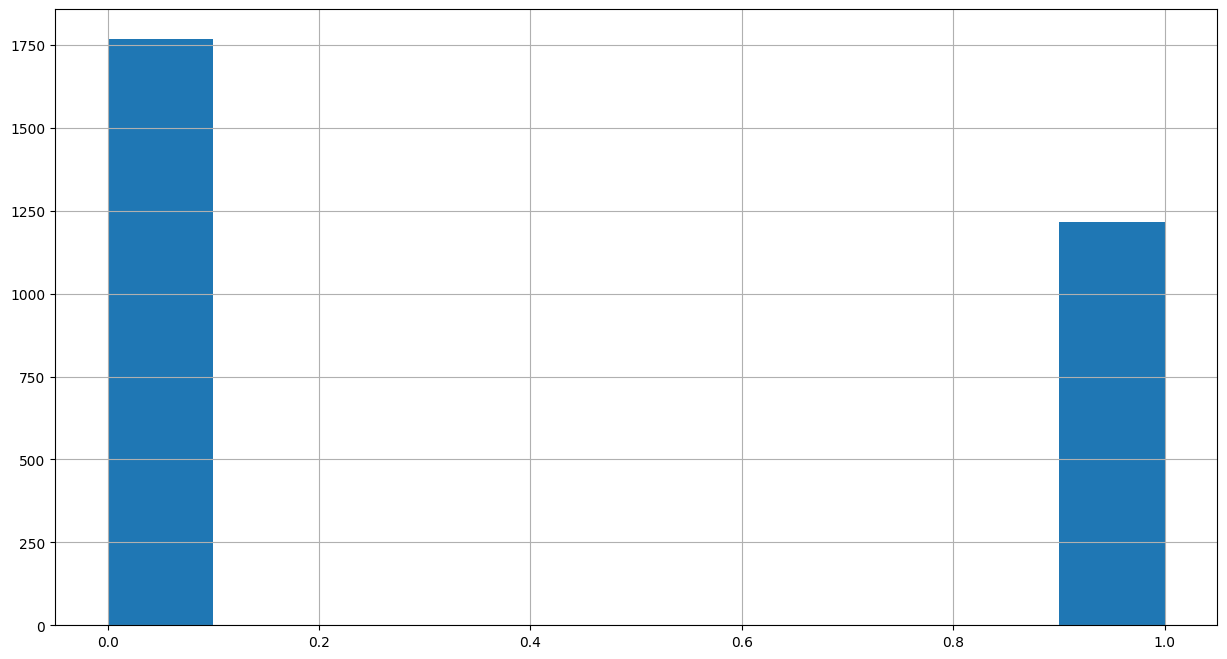

In [ ]:
base_players_dataset = pd.read_csv(PROJECT_FOLDER + 'assets/base_players_dataset.csv')

value_bins = [-np.inf, 0, np.inf]

base_players_dataset['value_cat'] = pd.cut(base_players_dataset["value_diff"], bins=value_bins, labels=range(len(value_bins)-1))

base_players_dataset['value_cat'].hist()

In [ ]:
# Create test set

from sklearn.model_selection import train_test_split

players_for_analysis = base_players_dataset[:]

players_for_analysis.dropna(subset=['value_cat'], inplace=True)

x_train, x_test, y_train, y_test = train_test_split(players_for_analysis, players_for_analysis['value_cat'], test_size=0.2, random_state=42, stratify=players_for_analysis['value_cat'])

In [ ]:
# Revert to clean training set

players_v1 = x_train.drop('value_cat', axis=1)
players_labels_v1 = x_train['value_cat'].copy()

In [ ]:
# Check null values
# Check outliers (3 std dev.) z-score > 3 or z-score < -3 ignore
# Prove within notebook that it is clean
# pd.describe()
# Use seaborn for heatmap of correlations
# Notebook with markdown and documentation

base_players_dataset.describe()

,Unnamed: 0.1,player_id,last_season,current_club_id,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,Age_2020,Position_2020,fm_player_index,...,Bal,Ant,Agi,Agg,Aer,Acc,value_2022,market_value,value_2020,value_diff
count,2985.000000,2985.000000,2985.0,2985.000000,2985.000000,2.985000e+03,2.985000e+03,2985.000000,2985.000000,2985.000000,...,2985.000000,2985.000000,2985.000000,2985.000000,2985.000000,2985.000000,2.985000e+03,2.985000e+03,2.985000e+03,2.985000e+03
mean,1492.000000,261942.089447,2021.0,3711.395980,181.563484,5.658164e+06,9.987879e+06,24.363819,0.964824,40039.275042,...,12.200670,12.179564,12.523618,11.629481,2.105863,12.909213,5.658164e+06,6.880667e+06,6.880667e+06,-1.222502e+06
std,861.839602,144693.118259,0.0,9502.255354,8.613620,1.072793e+07,1.624561e+07,3.290294,0.868982,26272.548157,...,2.295584,1.970608,1.877675,2.983995,0.924160,1.887982,1.072793e+07,1.348570e+07,1.348570e+07,8.971583e+06
min,0.000000,5336.000000,2021.0,3.000000,0.000000,2.300000e+04,2.300000e+04,16.000000,0.000000,0.000000,...,2.000000,4.000000,5.000000,1.000000,1.000000,6.000000,2.300000e+04,2.300000e+04,2.300000e+04,-9.720000e+07
25%,746.000000,144583.000000,2021.0,317.000000,177.000000,5.400000e+05,1.080000e+06,22.000000,0.000000,19459.000000,...,11.000000,11.000000,11.000000,10.000000,1.000000,12.000000,5.400000e+05,5.400000e+05,5.400000e+05,-1.800000e+06
50%,1492.000000,247377.000000,2021.0,800.000000,182.000000,1.800000e+06,3.600000e+06,24.000000,1.000000,33638.000000,...,12.000000,12.000000,13.000000,12.000000,2.000000,13.000000,1.800000e+06,1.800000e+06,1.800000e+06,-9.000000e+04
75%,2238.000000,354340.000000,2021.0,2578.000000,186.000000,5.400000e+06,1.260000e+07,27.000000,2.000000,60043.000000,...,14.000000,13.000000,14.000000,14.000000,3.000000,14.000000,5.400000e+06,7.200000e+06,7.200000e+06,4.500000e+05
max,2984.000000,804708.000000,2021.0,61825.000000,200.000000,1.440000e+08,1.800000e+08,30.000000,2.000000,100142.000000,...,20.000000,19.000000,19.000000,20.000000,12.000000,20.000000,1.440000e+08,1.800000e+08,1.800000e+08,1.242000e+08


In [ ]:
# Custom Nation transformer

from sklearn.base import BaseEstimator, TransformerMixin

class NationToRank(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        nation_encoder = base_players_dataset.groupby('Nation').sum().rank(ascending=True, method='first')
        max_rank = nation_encoder['value_diff'].max()
        temp = nation_encoder.copy()
        temp.sort_values('value_diff', ascending=False, inplace=True)
        temp['Nation'] = temp.index
        temp.reset_index(drop=True, inplace=True)
        temp['Nation_rank'] = 1 - (temp.index / temp.shape[0])
        X['Nation_rank'] = X['Nation'].map(temp.set_index('Nation')['Nation_rank'])
        X.drop('Nation', axis=1, inplace=True)
        
        # fifa_wr = pd.read_csv(PROJECT_FOLDER + "datasets/fifa_ranking-2021-05-27.csv")
        # nation_encoder = fifa_wr.query('rank_date == "2020-10-22"')[['rank', 'country_abrv']]
        # max_rank = nation_encoder['rank'].max() + 1
        # X['Nation_rank'] = 1 - (X['Nation'].map(nation_encoder.set_index('country_abrv')['rank']).fillna(max_rank) / max_rank)
        # X.drop('Nation', axis=1, inplace=True)
        return X

In [ ]:
# Custom Attributes transformer

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from utils import apply_mean_attribute_list, PLAYER_ATTR

class AttributeMerger(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        physical_attr = ['Acc', 'Pac', 'Sta', 'Str', 'Agi', 'Bal', 'Jum', 'Nat']
        mental_attr = ['Wor', 'Vis', 'Tea', 'Pos', 'OtB', 'Ldr', 'Fla', 'Det', 'Dec', 'Cnt', 'Cmp', 'Bra', 'Ant', 'Agg']
        apply_mean_attribute_list(X, 'M+P', physical_attr + mental_attr)
        X['M+P'] = X['M+P'] / 20
        X.drop(PLAYER_ATTR, axis=1, inplace=True)
        return X


In [ ]:
# based_encoder = base_players_dataset.groupby('Based').sum().rank(ascending=True, method='first')
# max_rank = based_encoder['value_diff'].max()
# temp = based_encoder.copy()
# temp.sort_values('value_diff', ascending=False, inplace=True)
# temp['Based'] = temp.index
# temp.reset_index(drop=True, inplace=True)
# temp['Based_rank'] = pow(0.5, temp.index / 10)
# temp.to_csv(PROJECT_FOLDER + 'assets/based_rank.csv', index=False)

In [ ]:
# Custom Based transformer

from sklearn.base import BaseEstimator, TransformerMixin

class BasedToRank(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        based_encoder = pd.read_csv(PROJECT_FOLDER + 'assets/based_rank.csv')
        X['Based_rank'] = X['Based'].map(based_encoder.set_index('Based')['Based_rank'])
        X['Based_rank'].fillna(0, inplace=True)
        X.drop('Based', axis=1, inplace=True)
        return X

In [ ]:
# Custom Foot transformer

from sklearn.base import BaseEstimator, TransformerMixin

class FootToRank(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['Foot_rank'] = X['Preferred Foot'].map(FOOTEDNESS_MAPPING)
        X.drop('Preferred Foot', axis=1, inplace=True)
        return X

In [ ]:
# Using transformation pipelines

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from utils import PLAYER_ATTR

players = x_train.drop('Value', axis=1)

features_v1 = {
    'att': (PLAYER_ATTR, ['M+P']),
    'num': (PLAYER_ATTR + ['Age'], None),
    # 'foo': (['Preferred Foot'], None),
    'pos': (['Best Pos'], None),
    #'nat': (['Nation'], None),
    'bas': (['Based'], None)
}

feature_labels_v1 = list(np.concatenate([f[1] if f[1] is not None else f[0] for k, f in features_v1.items()]).flat)

full_pipeline_v1 = ColumnTransformer([
    ("att", AttributeMerger(), features_v1['att'][0]),
    ("num", StandardScaler(), features_v1['num'][0]),
    # ("foo", FootToRank(), features_v1['foo'][0]),
    ("pos", OneHotEncoder(), features_v1['pos'][0]),
    #("nat", NationToRank(), features_v1['nat'][0]),
    ("bas", BasedToRank(), features_v1['bas'][0])
])

players_prepared_v1 = full_pipeline_v1.fit_transform(players)

In [ ]:
# Hyperparameter tuning

import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

tune_hyperparameters = False

if not tune_hyperparameters:
    value_predictor_v1 = joblib.load(PROJECT_FOLDER + 'models/rf_value_predictor.pkl')
else:
    total_value_without_model = x_train['value_diff'].sum()

    def predictor_performance(estimator, X, y):
        y_pred = estimator.predict(X)
        values = x_train[['value_diff']]
        values['y_true'] = y
        values.dropna(inplace=True)
        values['pred'] = y_pred

        total_value_without_model = values['value_diff'].sum()
        total_value_with_model = values.query('pred == 1')['value_diff'].sum()

        score = total_value_with_model / total_value_without_model
        return score

    rf_param_grid = {
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 20)],
        'max_depth': [int(x) for x in np.linspace(10, 100, num = 5)] + [None],
        'bootstrap': [True, False],
    }

    value_predictor_v1 = RandomForestClassifier()
    value_predictor_v1_grid_search = RandomizedSearchCV(value_predictor_v1, rf_param_grid, cv=10, scoring='accuracy', return_train_score=True, n_iter=10, error_score="raise")

    value_predictor_v1_grid_search.fit(players_prepared_v1, players_labels_v1)

    value_predictor_v1 = value_predictor_v1_grid_search.best_estimator_

    joblib.dump(value_predictor_v1, 'models/rf_value_predictor.pkl')

    # Use XGBoost or Adaboost

In [ ]:
# Select and train model
## RandomForestClassifier

value_predictor_v1.fit(players_prepared_v1, players_labels_v1)

RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=415)

In [ ]:
import joblib

joblib.dump(value_predictor_v1, 'models/rf_value_predictor.pkl')

['models/rf_value_predictor.pkl']

In [ ]:
# Test best threshold

value_predictions_proba_v1 = value_predictor_v1.predict_proba(players_prepared_v1)

total_value_without_model = x_train['value_diff'].sum()
max_value_without_model = x_train.query('value_diff > 0')['value_diff'].sum()

max_performance = max_value_without_model

train_players = x_train[:]
train_players['prob_1'] = value_predictions_proba_v1[:, 1]

model_performance_max = 0
ideal_threshold = 0
total_value_with_model_max = 0

for i in range(100):
    threshold = i / 100
    train_players['pred'] = value_predictions_proba_v1[:, 1] > threshold
    total_value_with_model = train_players.query('pred == 1')['value_diff'].sum()
    model_performance = total_value_with_model
    if model_performance > model_performance_max:
        model_performance_max = model_performance
        ideal_threshold = threshold
        total_value_with_model_max = total_value_with_model

print("Perf:", model_performance_max)
print("Max Perf:", max_performance)
print("Thres:", ideal_threshold)


Perf: 3208689994.0
Max Perf: 3275585994.0
Thres: 0.43


<AxesSubplot:>

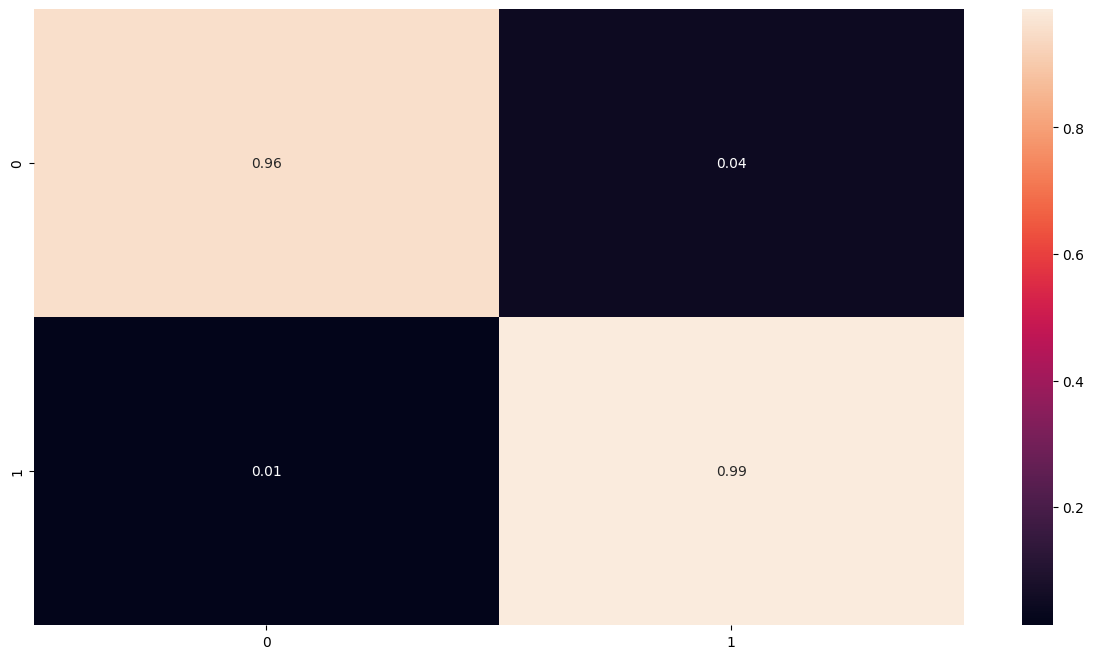

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(players_labels_v1, value_predictions_proba_v1[:, 1] > ideal_threshold)
conf_mx = conf_mx.astype('float') / conf_mx.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mx, annot=True, fmt='.2f')

In [ ]:
from utils import same_sort

#feature_importances_v1, feature_labels_v1 = same_sort(value_predictor_v1.feature_importances_, feature_labels_v1, reverse=True)

#plt.bar(feature_labels_v1, value_predictor_v1.feature_importances_)

In [ ]:
# Prepare test values for analysis

test_players_prepared = full_pipeline_v1.fit_transform(x_test)
test_players_labels = y_test

<AxesSubplot:>

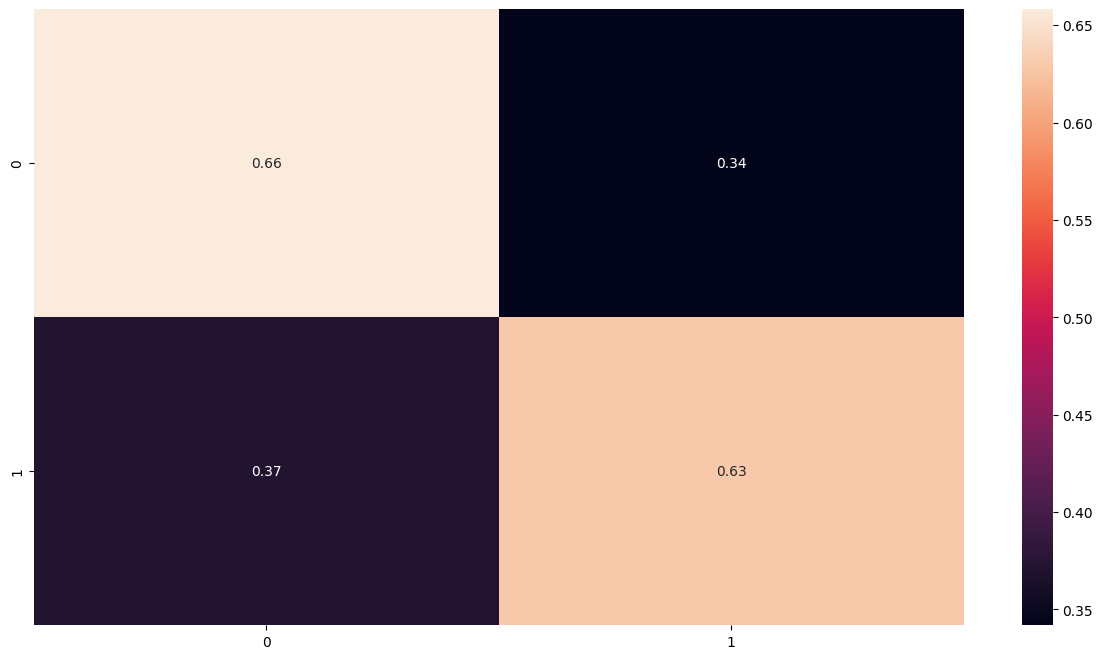

In [ ]:
# Test values confusion matrix

test_value_predictions_proba_v1 = value_predictor_v1.predict_proba(test_players_prepared)

conf_mx = confusion_matrix(test_players_labels, test_value_predictions_proba_v1[:, 1] > ideal_threshold)
conf_mx = conf_mx.astype('float') / conf_mx.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mx, annot=True, fmt='.2f')

In [ ]:
# Try with test model

test_value_predictions_proba_v1 = value_predictor_v1.predict_proba(test_players_prepared)

test_players_v1 = x_test[['Name', 'Age', 'Position', 'Club', 'PA', 'value_diff']]
test_players_v1['pred'] = test_value_predictions_proba_v1[:, 1] > ideal_threshold

test_total_value_without_model = test_players_v1['value_diff'].sum()
test_total_value_with_model = test_players_v1.query('pred == 1')['value_diff'].sum()
test_max_value_without_model = test_players_v1.query('value_diff > 0')['value_diff'].sum()

test_performance = test_total_value_with_model
max_test_performance = test_max_value_without_model

print("Perf:", test_performance)
print("Max Perf:", max_test_performance)
print("Value diff from max:", test_max_value_without_model - test_total_value_with_model)

Perf: 298540000.0
Max Perf: 945697000.0
Value diff from max: 647157000.0


In [ ]:
import sweetviz as sv
# report = sv.analyze(base_players_dataset)
# report.show_html()

test_players_errors = x_test.copy()
test_players_errors['pred'] = test_value_predictions_proba_v1[:, 1] > ideal_threshold
test_players_errors['real'] = test_players_errors['value_diff'] > 0
test_players_false_pos = test_players_errors.query('pred == 1 & real == 0')
test_players_false_neg = test_players_errors.query('pred == 0 & real == 1')

# report = sv.analyze(test_players_false_pos)
# report.show_html()

report = sv.analyze(test_players_false_neg)
report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:04 -> (00:00 left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab assets.


## Future work

There is still a lot to be done in terms of perfecting the results of the model

### What is missing

- A proper EDA. There was few explanation of the datasets I'm working and of the decisions took about which data was selected and used.

### Some questions

- How to better define performance metrics?
    - What should define success in the model?
        - In theory we want to increase the number of excellent investments in players, and find some "hidden" gems (e.g. not only the algorithm should predict already great players who obviously will increase in value, but also players who are not so obvious)

- How to analyse the errors, and act upon that analysis?
    - Right now the only analysis done points to a difficulty in evaluating players around 24-27 yo (late bloomers)
        - How can we implement this analysis and improve the model for these players?
    - How to better do error analysis?

- How can we increase our base dataset?
    - From more that 100k data points who are FM 20, we are reduced to only 2985.
        - This is due to a lack of data in transfermarkt
        - If we can find a strong correlation with some feature with an increase in value (e.g. if a player in 2020 has higher attributes than in 2017, then it has a higher value), can we extrapolate an increase in value without using exact data from Transfermarkt?
        - So for instance we can use this to find a correlation in a sample of matching data between FM17, FM20 and Transfermarkt and then extrapolate.
        
- How can we properly add weights to more relevant increases/decreases in value?
    - It is way more important for the model to be able to correctly predict big changes in value than small ones.
    - Does it make sense dividing in 3 groups (big decrease, small change - positive or negative, big increase)
    - How to incorporate big variations in price? E.g. players who even though the change is small - e.g. from 200k to 2M -, it varies a lot (positively or negatively)

- How can we extract more relevant features?
    - E.g. players tend to devalue if there are only 1 year left in their contract.

- Is the current value of a player a proper evaluator of the "real value" of a player?
    - Maybe the instantaneous value of a player in a given time is not really what we're looking for as a success measure.
    - Looking in the eyes of an investor, why wouldn't I want to invest in a young player who devalued due to some unforeseen circumstances (a failed transfer, an injury, a coach who doesn't like him), even though my attributes actually increased and I am a better player?

### Additional work
- Create an api in which we can feed player attributes, and then tell the ML algorithm whether the player increased or not in value in the past 3 years
- Create a simple front-end for this
- Make the system work online (the model improves itself with the new information being given)